# Retail Sales Analysis - Exploratory Data Analysis (EDA)

This notebook explores the retail dataset with summary statistics, visualizations, and initial insights.


In [1]:
# -------------------------
# 1. Import libraries
# -------------------------

import pandas as pd 
import numpy as np 


import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Set a style
sns.set(style="whitegrid")



In [2]:
# -------------------------
# 2. Load data
# -------------------------

df = pd.read_csv('../data/Superstore.csv', encoding='latin1')

df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [3]:
# -------------------------
# 3. Data overview
# -------------------------

df.info()
df.describe(include= 'all')
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

(9994, 21)

In [4]:

df.describe()
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

## 🔎 Step 1. Variable-by-Variable Analysis

### **1. Sales**

- Mean = **229.9**, Std = **623.2** → **Std > Mean** 🚨
- Min = 0.44, Max = **22,638.48**
- Median (50%) = 54.49 → way lower than mean (229.9).

👉 Interpretation:

- **Right-skewed distribution** → Most sales are small, but some extremely large sales drive the average way up.
- Mean is not representative; **median** is a better "typical" value here.
- Outliers (like 22,638) inflate variability.

---

### **2. Quantity**

- Mean = 3.79, Std = 2.22
- Min = 1, Max = 14
    
    👉 Distribution is fairly tight around the mean.
    
    Most purchases are **small quantities (1–5 items)**.
    
    This looks reasonable and not very skewed.
    

---

### **3. Discount**

- Mean = 0.156 (~15.6%)
- Std = 0.206
- Min = 0, Max = 0.8 (80%)
- 50% of values = 0.20 or below

👉 Discounts are mostly **0–20%**, but some go as high as **80%**.

This suggests promotions/clearances exist, but most discounts are modest.

---

### **4. Profit**

- Mean = **28.66**, Std = **234.26** → Std ≫ Mean 🚨
- Min = **–6599.98 (huge losses)**
- Max = **8399.98 (huge gains)**
- Median = **8.66** → much lower than mean.

👉 Interpretation:

- Profits are **highly variable**, sometimes **negative**.
- Most orders make only small profits (median = 8.66), but a few orders cause very large profits or very large losses.
- The distribution is extremely **skewed and heavy-tailed**.
- Mean is misleading here; median and **profit margin analysis by category** would be more meaningful.

---

## 🔎 Step 2. Insights

1. **Sales and Profit are highly skewed** → better use log transformation or percentiles when modeling.
2. **Std > Mean for Sales & Profit** → strong variability, mean is not a good summary measure.
3. **Profit can be negative** → not all sales are profitable. You’ll want to segment by **category, sub-category, or discount levels** to see why.
4. **Discounts impact profitability** → check if higher discounts correlate with losses.
5. **Quantity is stable** → most orders are small, so variability is mainly in **price/profit**, not in quantity.

---

✅ So: This dataset tells a story of **mostly small transactions, a few very large ones, and significant risks (losses) when discounts are high.**

That’s why this dataset is often used for **profitability, discount strategy, and customer segmentation analysis**.

In [5]:
# -------------------------
# 4. Missing values
# -------------------------
df.isnull().sum()



Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
# -------------------------
# 5. Dublicated values
# -------------------------

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [7]:
# Rename columns - removing the space in the middle 

df.columns = df.columns.str.replace(' ','',regex= False)

print(df.columns)

Index(['RowID', 'OrderID', 'OrderDate', 'ShipDate', 'ShipMode', 'CustomerID',
       'CustomerName', 'Segment', 'Country', 'City', 'State', 'PostalCode',
       'Region', 'ProductID', 'Category', 'Sub-Category', 'ProductName',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


## Basic analysis 

## 1.Sales Performance Insights

#### Top-selling products (by revenue & quantity).

In [8]:
print('Top_ selling products by revenue \n')
best_selling_revenue = df.groupby('ProductName')['Sales'].sum().sort_values(ascending= False).head(10)
print(best_selling_revenue)

best_selling_quantity = df.groupby('ProductName')['Quantity'].sum().sort_values(ascending= False).head(10)
print('\nTop_selling products by quantity \n')
print(best_selling_quantity)

Top_ selling products by revenue 

ProductName
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

Top_selling products by quantity 


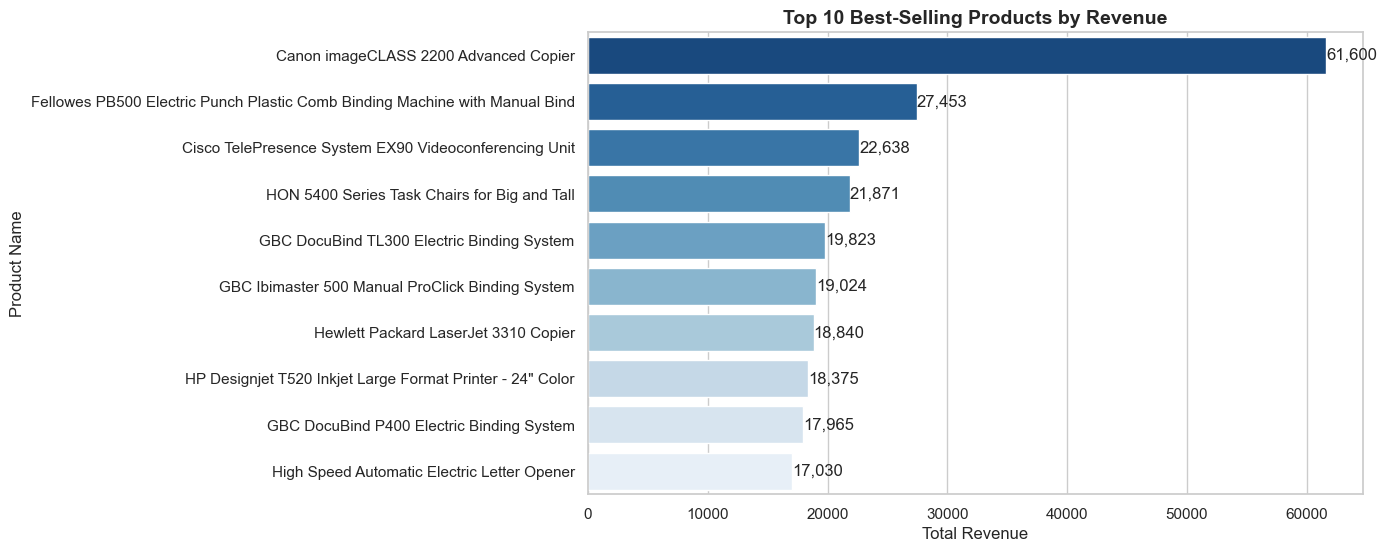

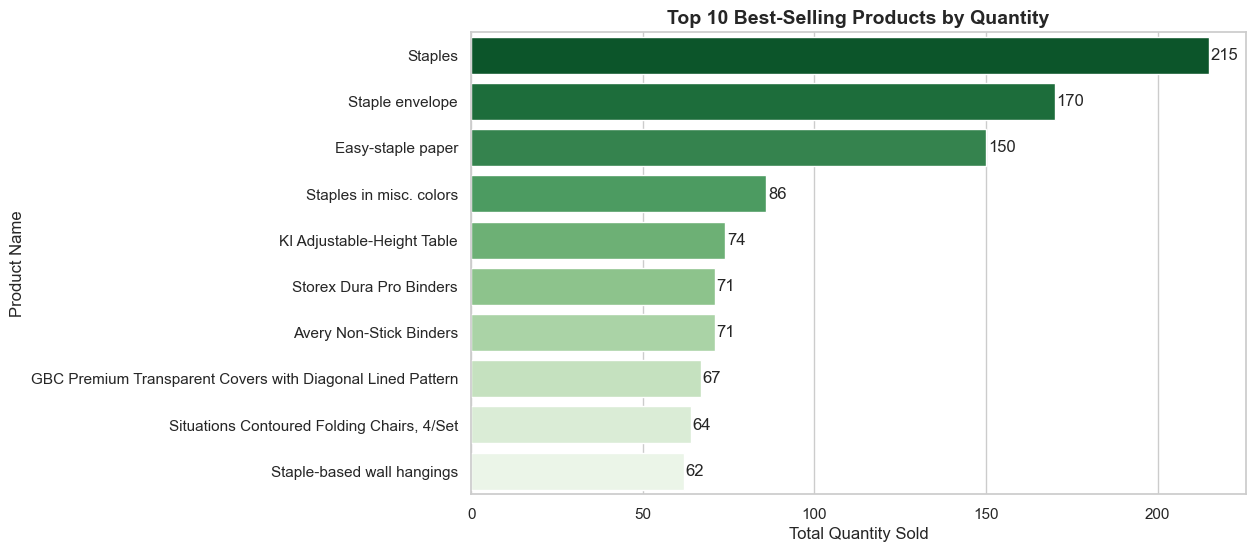

In [9]:


# ---------------------------
# Top 10 Products by Revenue
# ---------------------------
best_selling_revenue = (
    df.groupby('ProductName')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(
    x=best_selling_revenue.values,
    y=best_selling_revenue.index,
    hue=best_selling_revenue.index,
    palette='Blues_r'
)
plt.title('Top 10 Best-Selling Products by Revenue', fontsize=14, weight='bold')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')

# Annotate values
for i, v in enumerate(best_selling_revenue.values):
    plt.text(v + 0.5, i, f"{v:,.0f}", va="center")

plt.show()


# ---------------------------
# Top 10 Products by Quantity
# ---------------------------
best_selling_quantity = (
    df.groupby("ProductName")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(
    x=best_selling_quantity.values,
    y=best_selling_quantity.index,
    hue= best_selling_quantity.index,
    palette="Greens_r"
)
plt.title("Top 10 Best-Selling Products by Quantity", fontsize=14, weight="bold")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")

# Annotate values
for i, v in enumerate(best_selling_quantity.values):
    plt.text(v + 0.5, i, f"{v:,.0f}", va="center")

plt.show()


#### Top customers (by total purchases).

In [10]:
print('Top 10 customers by total purchases: ')

print(df.groupby('CustomerName')['Sales'].sum().sort_values(ascending=False).head(10))

Top 10 customers by total purchases: 
CustomerName
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


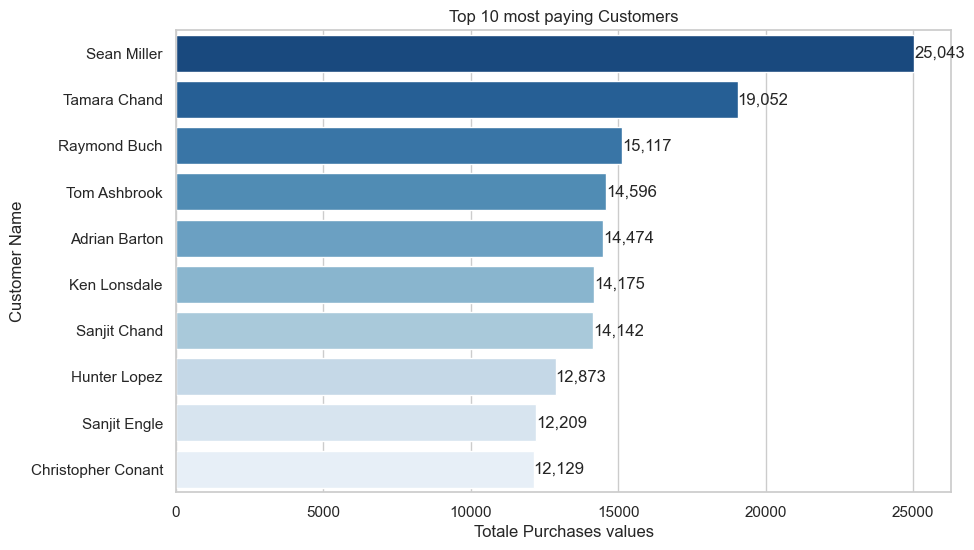

In [11]:
top_customers_purchases =df.groupby('CustomerName')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize= (10,6))
sns.barplot(
    x=top_customers_purchases.values ,
    y=top_customers_purchases.index,
    hue= top_customers_purchases.index,
    palette='Blues_r'
)

for i, v in enumerate(top_customers_purchases):
    plt.text(v + 0.5 , i , f'{v:,.0f}' , va='center')

plt.title('Top 10 most paying Customers')
plt.xlabel('Totale Purchases values')
plt.ylabel('Customer Name')
plt.show()

#### Top Regions (by sales).

In [12]:
print ('Top Regions by sales')
top_region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending= False)
print(top_region_sales)



Top Regions by sales
Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64


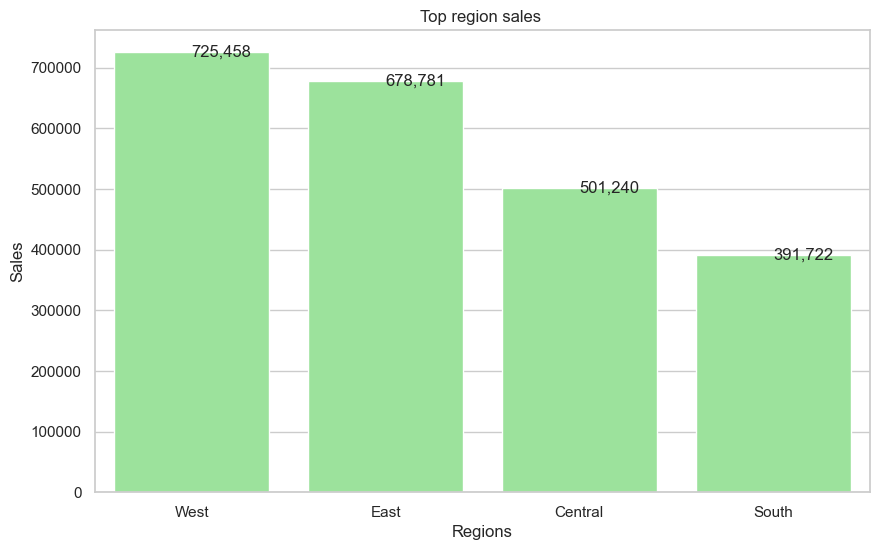

In [13]:
plt.figure(figsize=(10,6))

sns.barplot(
    y=top_region_sales.values ,
    x=top_region_sales.index,
    #hue= top_region_sales.values,
    color= 'lightGreen' 
)

plt.title('Top region sales ')
plt.xlabel('Regions')
plt.ylabel('Sales')

for i , v in enumerate(top_region_sales):
    plt.text(i , v, f'{v:,.0f}' , va= 'center')

plt.show()

## 2.Time-Series Analysis

#### Sales trend over time (daily, monthly).

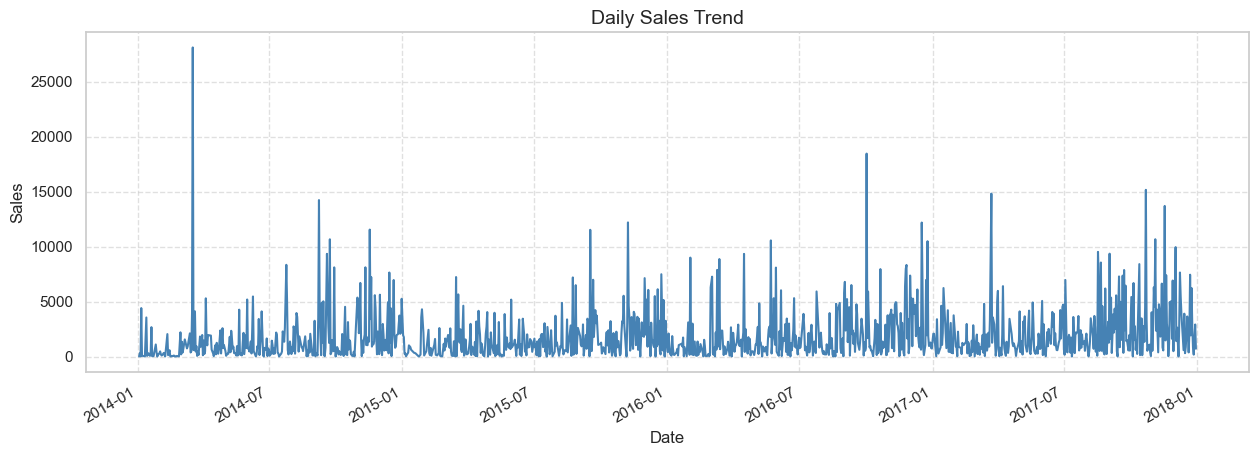

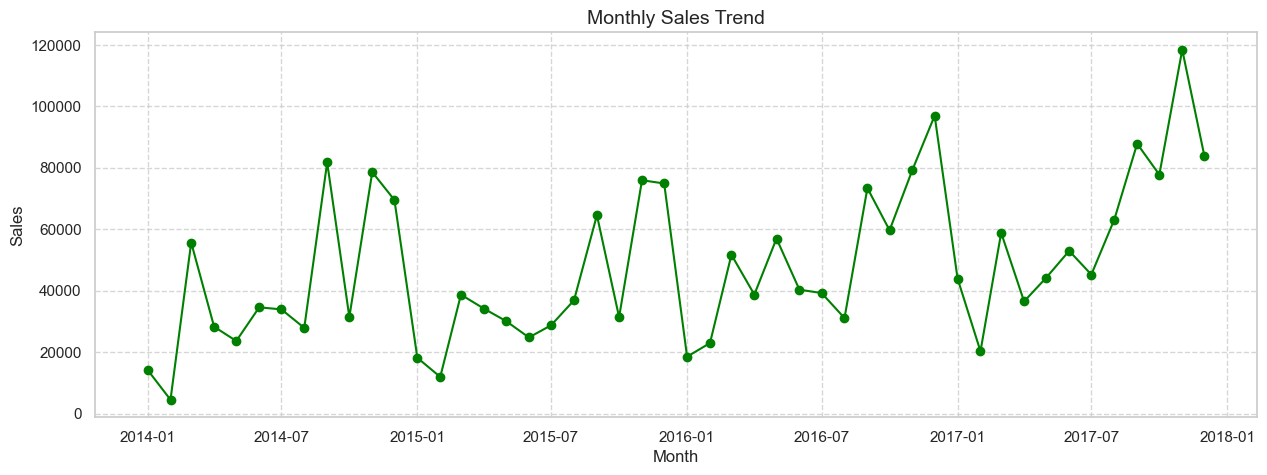

In [14]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
# Daily Sales
daily_sales = df.groupby('OrderDate')['Sales'].sum()
plt.figure(figsize=(15,5))
daily_sales.plot(kind='line', color='steelblue')
plt.title('Daily Sales Trend', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Monthly sales 

monthly_sales = df.groupby(df['OrderDate'].dt.to_period('M'))['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()
plt.figure(figsize=(15,5))
plt.plot(monthly_sales.index,monthly_sales.values,marker = 'o', color='green')
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True, linestyle='--', alpha=0.6)



plt.grid(alpha=0.8)
plt.show()


#### Seasonality patterns (peak months).

for seasonality patterns (peak months) we want to see which months across all years consistently have higher sales.

In [15]:
df['Month'] = df['OrderDate'].dt.month


seasonality = df.groupby('Month')['Sales'].sum()

print(seasonality)

Month
1      94924.8356
2      59751.2514
3     205005.4888
4     137762.1286
5     155028.8117
6     152718.6793
7     147238.0970
8     159044.0630
9     307649.9457
10    200322.9847
11    352461.0710
12    325293.5035
Name: Sales, dtype: float64


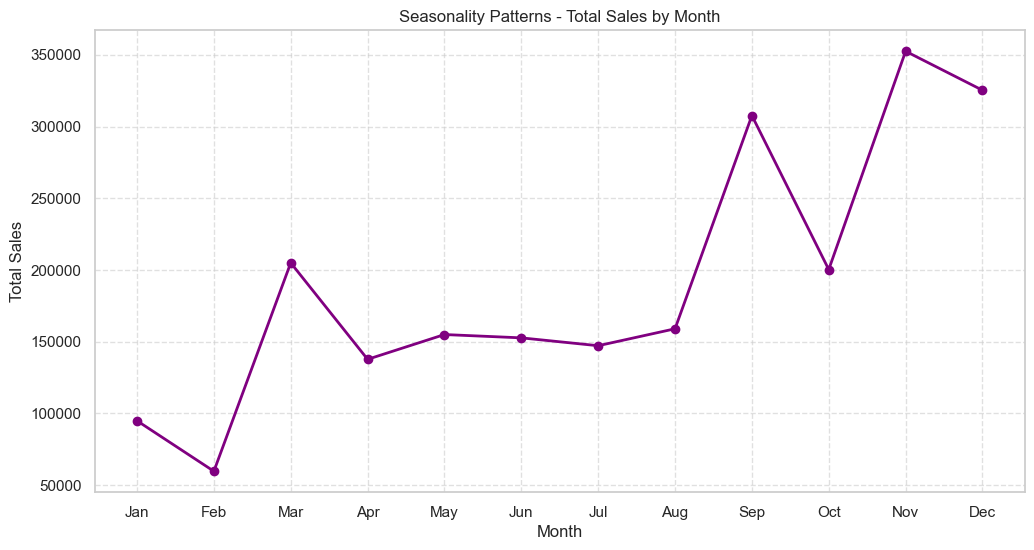

In [16]:
plt.figure(figsize=(12,6))

plt.plot(seasonality.index , seasonality.values , marker = 'o' ,color = 'purple' , linewidth = 2)
plt.title('Seasonality Patterns - Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1,13) , ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True, linestyle='--', alpha=0.6)


    

plt.show()

However If we just sum sales by month across all years:

* Years with more customers or more invoices will dominate.

* Example: If 2011 has twice as many transactions as 2010, December 2011 will “inflate” the December total, making it look like December is always the strongest month.

👉 To truly detect seasonality,
we want to remove the effect of different year sizes.

In [17]:
# Extract Year and month 

df['Year']= df['OrderDate'].dt.year
# we Extracted Month earlier 

monthly_Avg= df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Average sales per month across years
seasonalitys = monthly_Avg.groupby('Month')['Sales'].mean()

print(seasonalitys)


Month
1     23731.208900
2     14937.812850
3     51251.372200
4     34440.532150
5     38757.202925
6     38179.669825
7     36809.524250
8     39761.015750
9     76912.486425
10    50080.746175
11    88115.267750
12    81323.375875
Name: Sales, dtype: float64


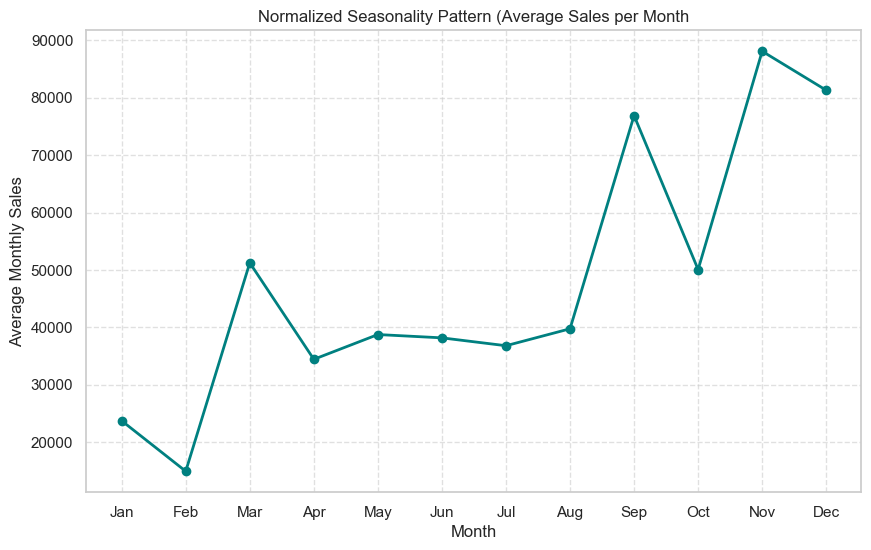

In [18]:
plt.figure(figsize=(10,6))
plt.plot(seasonalitys.index, seasonalitys.values, marker='o', color='teal', linewidth=2)
plt.title('Normalized Seasonality Pattern (Average Sales per Month')
plt.xlabel('Month')
plt.ylabel('Average Monthly Sales')
plt.xticks(range(1,13), 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

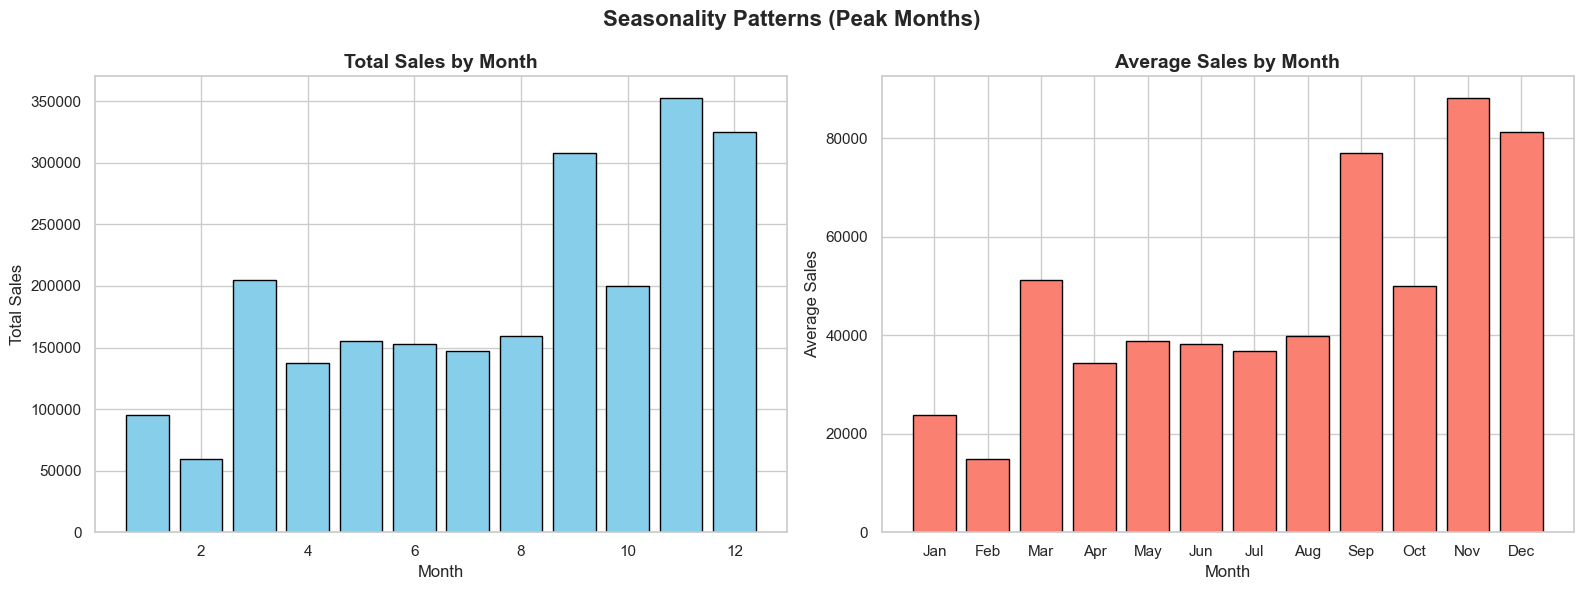

In [19]:


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].bar(seasonality.index , seasonality.values , color = 'skyblue' , edgecolor= 'black')
axes[0].set_title("Total Sales by Month", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Total Sales")
axes[1].set_xticks(range(1,13), 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])


axes[1].bar(seasonalitys.index , seasonalitys.values , color = 'salmon' , edgecolor= 'black')
axes[1].set_title("Average Sales by Month", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Average Sales")
axes[1].set_xticks(range(1,13), 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.suptitle("Seasonality Patterns (Peak Months)", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

I placed **two bar plots side by side**:

- **Left:** Total monthly sales across all years (so you see absolute peaks).
- **Right:** Average monthly sales per month (so you see normalized seasonality across years).

### Insights:

- **November (11)** is the strongest peak, followed by **December (12)** and **September (9)** → very strong seasonal effect.
- **February (2)** is consistently the weakest month.
- Averaging confirms that these peaks hold across years (not just one outlier year).

#### Year-over-year growth.

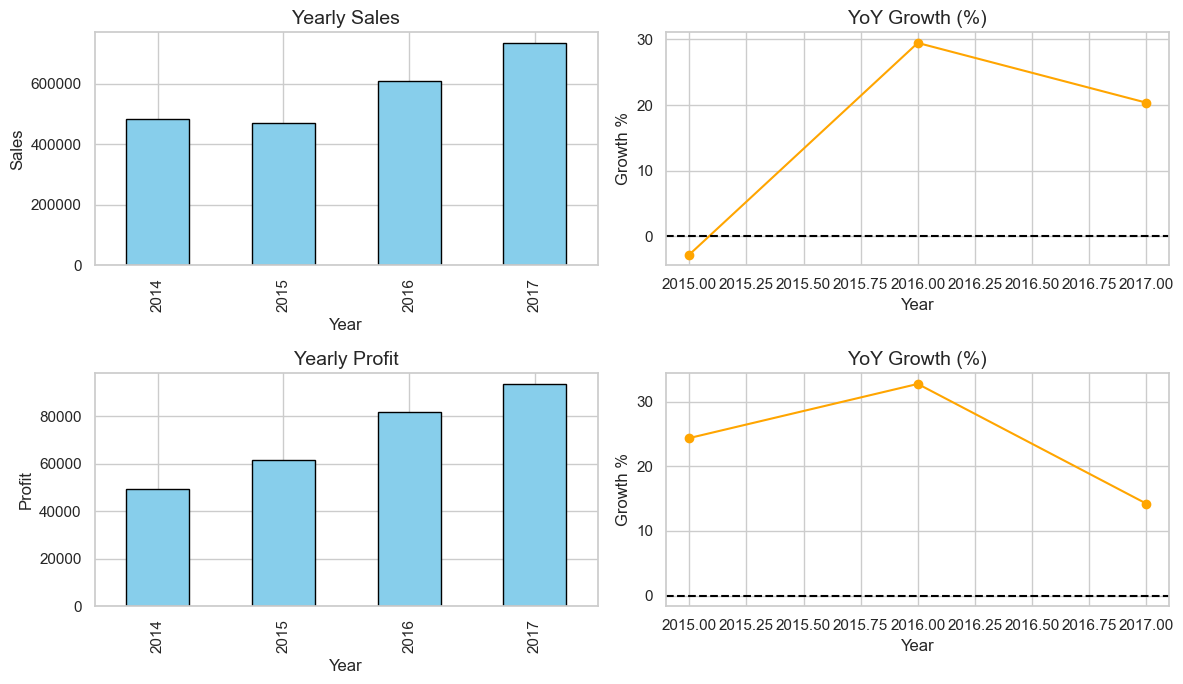

In [20]:

# Yearly sales
yearly_sales = df.groupby('Year')['Sales'].sum()

# Yearly Profit 
yearly_profit = df.groupby('Year')['Profit'].sum()

# YoY sales growth (%)
yoy_sales_growth = yearly_sales.pct_change() * 100

# YoY profit growth (%)
yoy_profit_growth = yearly_profit.pct_change() * 100

# Plot
plt.figure(figsize=(12,7))

# Bar plot for yearly sales
plt.subplot(2,2,1)
yearly_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Yearly Sales', fontsize=14)
plt.ylabel('Sales')
plt.xlabel('Year')


# Line plot for YoY growth
plt.subplot(2,2,2)
yoy_sales_growth.plot(kind='line', color='orange' ,marker= 'o' )
plt.title('YoY Growth (%)', fontsize=14)
plt.ylabel('Growth %')
plt.xlabel('Year')
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()

plt.subplot(2,2,3)
yearly_profit.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Yearly Profit', fontsize=14)
plt.ylabel('Profit')
plt.xlabel('Year')


plt.subplot(2,2,4)
yoy_profit_growth.plot(kind='line', color='orange', marker = 'o')
plt.title('YoY Growth (%)', fontsize=14)
plt.ylabel('Growth %')
plt.xlabel('Year')
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

In [21]:
print(yoy_profit_growth)

print(yearly_profit)

Year
2014          NaN
2015    24.371540
2016    32.744284
2017    14.235675
Name: Profit, dtype: float64
Year
2014    49543.9741
2015    61618.6037
2016    81795.1743
2017    93439.2696
Name: Profit, dtype: float64


- **2015 was a weak year** → Sales dipped slightly (−2.83%). This could be due to fewer customers, seasonal issues, or external market conditions. Worth investigating which categories or regions underperformed.
- **2016 was a breakout year** → Sales grew nearly **30% YoY**, the highest in the dataset. This might be linked to successful product launches, promotions, or expansion into new markets.
- **2017 continued strong growth** → Another **20% increase**, showing momentum. Growth slowed compared to 2016, but still indicates a healthy business trajectory.
- **Trend**: Overall, from 2014 → 2017, sales grew from **~484K → ~733K**, a **total increase of ~52%** in 4 years. That’s a solid long-term upward trend.

### **1. Drill down by category or region (2016 growth driver)**

- Sales jumped **~29% in 2016**.
- To confirm what drove this:
    - **Group sales by Category and Year** → look for which categories grew the most in 2016.

In [22]:
category_growth = df.groupby(['Year','Category'])['Sales'].sum().unstack()
yoy_category_growth = category_growth.pct_change() * 100
yoy_category_growth


Category  Furniture  Office Supplies  Technology
Year                                            
2014            NaN              NaN         NaN
2015       8.477093        -9.581824   -7.130049
2016      16.645257        34.034351   39.060729
2017       8.288444        33.792106   20.041435

In [23]:
yoy_profit_change =  df.groupby(['Year','Category'])['Profit'].sum().unstack() 
yoy_profit_change.pct_change() * 100

Category   Furniture  Office Supplies  Technology
Year                                             
2014             NaN              NaN         NaN
2015      -44.753489        11.092248   55.883907
2016      130.828682        39.688767   18.714631
2017      -56.632017        13.334936   27.430650

In [24]:
region_growth = df.groupby(['Year','Region'])['Sales'].sum().unstack()

yoy_region_growth = region_growth.pct_change() * 100
yoy_region_growth

Region    Central       East      South       West
Year                                              
2014          NaN        NaN        NaN        NaN
2015    -0.928312  21.488578 -31.282776  -5.353409
2016    43.310319  15.578228  31.180282  33.946703
2017    -0.224682  17.930063  31.295336  33.415900

### 1. Contribution to 2016 Growth

- **Total sales growth (2015 → 2016):** +29.5% (from your YoY calc).
- Breaking down by category:
    - **Furniture:** 8.47% → 16.64% → **+8.17%**
    - **Office Supplies:** -9.58% → 34.03% → **+43.61%**
    - **Technology:** -7.13 → 39.06% → **+46.19%**

✅ Insight:

The **2016 jump was mainly driven by Technology (+46.19%) and Office Supplies (+43.61%)**, while Furniture grew more moderately (+8.17%).

So, the surge wasn’t evenly spread—it was largely a **Tech & Supplies boom**.

### 2.Seasonality vs Growth

- From your earlier **seasonality plots**, peak months were typically **Nov–Dec (holiday & year-end demand)**.
- In 2016,  peaks aligned with **Office Supplies + Tech**, it suggests **back-to-school + holiday electronics** boosted sales that year.

✅ Insight:

The **growth year (2016)** coincided with **seasonal demand amplifying categories (Tech & Supplies)**.

In [25]:
category_profit = df.groupby(['Year' , 'Category'])[['Sales' , 'Profit']].sum()
category_profit['Profit_Margin'] = category_profit['Profit'] / category_profit['Sales']



category_profit.unstack()

Sales                                 Profit                  \
Category    Furniture Office Supplies  Technology  Furniture Office Supplies   
Year                                                                           
2014      157192.8531      151776.412  175278.233  5457.7255      22593.4161   
2015      170518.2370      137233.463  162780.809  3015.2029      25099.5338   
2016      198901.4360      183939.982  226364.180  6959.9531      35061.2292   
2017      215387.2692      246097.175  271730.811  3018.3913      39736.6217   

                     Profit_Margin                             
Category  Technology     Furniture Office Supplies Technology  
Year                                                           
2014      21492.8325      0.034720        0.148860   0.122621  
2015      33503.8670      0.017683        0.182897   0.205822  
2016      39773.9920      0.034992        0.190612   0.175708  
2017      50684.2566      0.014014        0.161467   0.186524


#### 1. **Sales Trends (2014 → 2017)**

- **Furniture**: steady growth → **157k → 215k** (≈ +37%).
- **Office Supplies**: strong growth, especially in 2017 → **152k → 246k** (≈ +62%).
- **Technology**: also grows strongly → **175k → 272k** (≈ +55%).

✅ Technology consistently leads in sales, followed by Office Supplies (surging in 2017), then Furniture.

---

#### 2. **Profit Trends**

- **Furniture**: fluctuates, low profit compared to sales:
    - 2014: 5.4k → peak in 2016 (6.9k) → drop to 3.0k in 2017.
- **Office Supplies**: climbs consistently → **22.6k → 39.7k**.
- **Technology**: very profitable → **21.5k → 50.7k**.

✅ Technology dominates profit, Office Supplies is solid, Furniture struggles.

---

#### 3. **Profit Margin (Profit ÷ Sales)**

- **Furniture**: very low → 1.7%–3.5% (barely profitable).
- **Office Supplies**: strong → ~15%–19%.
- **Technology**: strongest margins → ~12%–20%.

📉 **Furniture looks like a red flag** → big sales volume but razor-thin margins.

📈 **Office Supplies & Technology drive profitability**.

---

#### 4. **Insights**

- **Best performer**: Technology → high sales, high profit, strong margins.
- **Hidden gem**: Office Supplies → smaller sales but excellent margins.
- **Weak spot**: Furniture → poor margins, profit barely grows despite sales growth.

### Lets zoom in 
#### Sales Growth (2015 → 2016)

- **Furniture**:
    
    170,518 → 198,901 (**+16.6%**)
    
- **Office Supplies**:
    
    137,233 → 183,940 (**+34.0%**)
    
- **Technology**:
    
    162,781 → 226,364 (**+39.0%**)
    

✅ **Technology and Office Supplies were the main drivers** of sales growth between 2015 and 2016. Furniture grew steadily but not as fast.

---

#### 💰 Profit Growth (2015 → 2016)

- **Furniture**:
    
    3,015 → 6,960 (**+130.8%**)
    
- **Office Supplies**:
    
    25,100 → 35,061 (**+39.7%**)
    
- **Technology**:
    
    33,504 → 39,774 (**+18.7%**)
    

✅ **Furniture’s profit more than doubled**, recovering from its poor 2015 margin.

✅ **Office Supplies kept solid profit growth**, aligned with sales growth.

⚠️ **Technology had big sales growth but weaker profit growth**, suggesting price cuts, discounts, or higher costs.

---

#### 📈 Profit Margin Trends (2015 → 2016)

- **Furniture**: 1.8% → 3.5% (**margin improved**)
- **Office Supplies**: 18.3% → 19.1% (**stable/high margin**)
- **Technology**: 20.6% → 17.6% (**margin dropped**)

🔑 **Insights**:

- Growth in 2016 was **volume-driven for Technology** but less profitable.
- **Furniture turned around** and became healthier profit-wise.
- **Office Supplies balanced both sales and margin**, making it the most consistent performer.

### Sales Growth (2014 → 2015)
- **Furniture**: **↑ 8.5%** (157,193 → 170,518)
- **Office Supplies**: **↓ 9.6%** (151,776 → 137,233)
- **Technology**: **↓ 7.1%** (175,278 → 162,781)
- **Total Sales**: **↓ ~3.5%** overall

So the *decline wasn’t across the board* → Furniture grew, but Office Supplies and Technology dragged down the total.

overall sales dipped mainly due to Office Supplies (-9.6%) and Technology (-7.1%). Furniture actually grew but at the cost of lower margins. This suggests that the company faced weaker demand in non-furniture categories, possibly because of market trends (digitization, delayed tech upgrades). However, higher profit margins in Office Supplies and Tech indicate the company may have tightened pricing and controlled discounts to preserve profitability, even at the cost of lower sales.

### Profit Growth (2014 → 2015)

#### Technology

- **Sales**: 175,278 → 162,780 (↓ dropped)
- **Profit**: 21,492 → 33,503 (↑ increased a lot)
- **Profit Margin**: 12.3% → 20.6% (↑ stronger efficiency)

👉 Even though **sales volume decreased**, the company was **selling more profitable products** or **managing costs better** in 2015.

---

#### Office Supplies

- **Sales**: 151,776 → 137,233 (↓ dropped)
- **Profit**: 22,593 → 25,100 (↑ increased)
- **Profit Margin**: 14.9% → 18.3% (↑ improved efficiency)

👉 Same situation: fewer sales, but **higher margins**, so total profit still increased.

---

#### Furniture

- **Sales**: 157,192 → 170,518 (↑ increased)
- **Profit**: 5,457 → 3,015 (↓ dropped a lot)
- **Profit Margin**: 3.5% → 1.8% (↓ margin collapsed)

👉 Furniture went the opposite way: more sales, but **very low profitability**, maybe due to heavy discounts, higher costs, or low-margin items.

---

📌 **Conclusion**:

- For **Technology & Office Supplies**, 2015 was a year of **“quality over quantity”** — fewer sales but **better margins**, leading to **higher profits**.
- For **Furniture**, they sold more but made less profit → could mean **bad pricing strategy** or **cost inefficiencies**.

## 3. Customer Behavior

#### Average basket size (# of items per invoice).

In [26]:
basket_size = df.groupby('OrderID')['Quantity'].sum()
avg_basket_size = basket_size.mean()

print(f"Average Basket Size: {avg_basket_size:.2f} items per invoice")

Average Basket Size: 7.56 items per invoice


* By Year → see if customers started buying more/less items per basket over time.

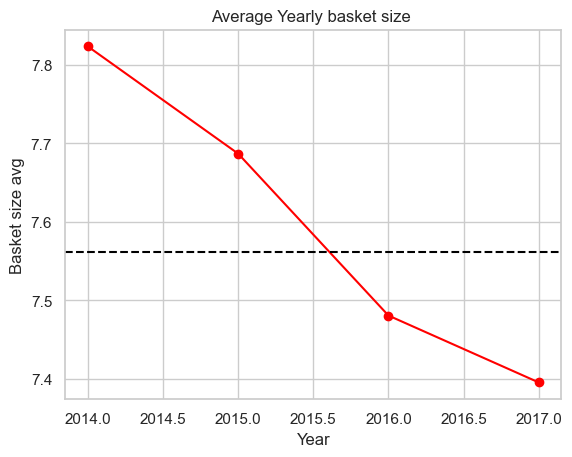

In [27]:

yearly_avg_basket_size = df.groupby(['Year' , 'OrderID'])['Quantity'].sum().groupby('Year').mean()

yearly_avg_basket_size.plot(kind = 'line' , color ='red' , marker ='o')
plt.title('Average Yearly basket size ')
plt.xlabel('Year')
plt.ylabel('Basket size avg')
plt.axhline(avg_basket_size,color = 'black' , linestyle = '--')
plt.show()

#### Average order value.

In [28]:
order_value = df.groupby('OrderID')['Sales'].sum()
avg_order_value = order_value.mean()
print(f"Average Order Value : {avg_order_value:.2f} sale per invoice")

Average Order Value : 458.61 sale per invoice


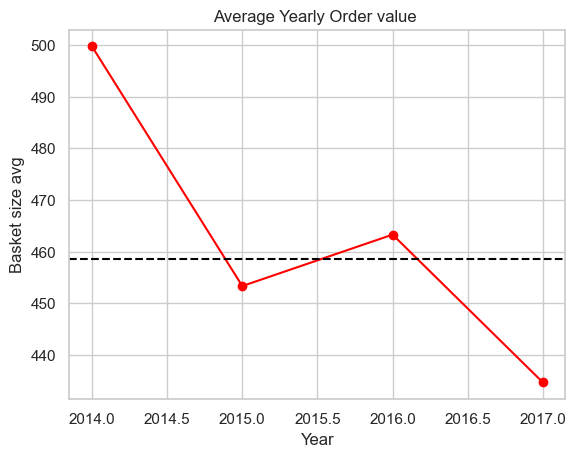

In [29]:
yearly_avg_order_value = df.groupby(['Year' , 'OrderID'])['Sales'].sum().groupby('Year').mean()
yearly_avg_order_value.plot(kind = 'line' , color ='red' , marker ='o')
plt.title('Average Yearly Order value ')
plt.xlabel('Year')
plt.ylabel('Basket size avg')
plt.axhline(avg_order_value, color='black', linestyle='--')
plt.show()

In [30]:
print('yearly_order_value',yearly_avg_order_value)
print('yearly_avg_basket_size',yearly_avg_basket_size)

yearly_order_value Year
2014    499.739420
2015    453.306849
2016    463.274219
2017    434.626707
Name: Sales, dtype: float64
yearly_avg_basket_size Year
2014    7.823529
2015    7.686898
2016    7.480608
2017    7.395376
Name: Quantity, dtype: float64


### 1. **Declining Order Value**

- In **2014**, the **average order value (AOV)** was ~$500 .
  
- By **2017**, it dropped to ~$435  (↓ 13%).
- This suggests that customers are spending **less per transaction over time**.

👉 Possible reasons:

- Discounts or promotions leading to lower invoice totals.
- Customers buying cheaper products (shift in product mix).
- Increased price sensitivity.

---

### 2. **Shrinking Basket Size**

- The **average basket size** decreased from **7.82 items (2014)** to **7.39 items (2017)** (↓ 5.5%).
- Customers are buying **fewer items per invoice**.

👉 Interpretation:

- Customers may be **purchasing only essentials** instead of bulk shopping.
- Rise of **single-item transactions** (possibly tech products bought individually).

---

### 3. **Combined Effect**

- **Both metrics (AOV & basket size) are declining**, meaning:
    - Customers are spending less **and** buying fewer items.
    - Could signal **increased competition**, **economic slowdown**, or **shifts in purchasing behavior**.

---

### 4. **But Important Note**

- Even though **order-level metrics are dropping**, **total sales by year kept growing (2015–2017)**.
    - This implies **higher order volumes** (more customers or more frequent purchases) are compensating for the decline per transaction.

---

✅ **Insight Summary:**

- From 2014 → 2017, **customers buy less per order (in value & items)**.
- Growth in **total sales** is being driven by **more transactions**, not by larger/more expensive baskets.
- This shift highlights the importance of **customer acquisition** and **order frequency**, rather than relying on upselling in each transaction.

**Lets see if discount effect the drop of order value and basket size**

In [31]:
discount_order = df.groupby('OrderID')['Discount'].sum() 
avg_discount_order = discount_order.mean() * 100 

yearly_discount_avg = df.groupby(['Year' ,'OrderID'])['Discount'].sum().groupby('Year').mean()
yearly_discount_avg * 100


Year
2014    32.555212
2015    31.511561
2016    30.442586
2017    30.718435
Name: Discount, dtype: float64

**Average Discount is Falling**

- From **32.55% (2014) → ~30.7% (2017)**, the discounts have slightly decreased.
- This means customers are paying closer to the **full price** than before.

#### 🔎 What This Means

- **Customer behavior is changing** → they’re becoming **more price-sensitive** and **buying smaller baskets**.
- smaller discounts likely contributed to lower basket sizes and reduced order value
- This could suggest:
    - Stronger competition (customers compare more and buy less in one place).
    - Economic/environmental factors reducing purchasing power.
    - A shift toward **Technology** products (higher profit but fewer items per basket).

In [32]:
yearly_order_counts = df.groupby('Year')['OrderID'].nunique()
print('yearly_order_counts',yearly_order_counts)

#### Number of Customers over the years 

customers_count = df.groupby('Year')['CustomerID'].nunique()
print('customers_count',customers_count)

yearly_order_counts Year
2014     969
2015    1038
2016    1315
2017    1687
Name: OrderID, dtype: int64
customers_count Year
2014    595
2015    573
2016    638
2017    693
Name: CustomerID, dtype: int64


✅**Final interpretation**:

The business is attracting **more repeat purchases** (good for loyalty), but**each order is worth less**

. The reduction in discounts may have caused customers to spread purchases out into smaller, lower-value baskets.

 Growth in total sales is being driven by more transactions, and increase in customers count  not by larger/more expensive baskets.

#### Customer segmentation: frequent vs. one-time buyers.

In [33]:
customer_order_counts = df.groupby('CustomerID')['OrderID'].nunique()


# Segment customers
frequent_buyers = customer_order_counts[customer_order_counts > 1]
one_time_buyers = customer_order_counts[customer_order_counts == 1]

print("Frequent Buyers:", len(frequent_buyers))
print("One-Time Buyers:", len(one_time_buyers))



# Compare sales contribution
freq_sales = df[df['CustomerID'].isin(frequent_buyers.index)]['Sales'].sum()
one_time_sales = df[df['CustomerID'].isin(one_time_buyers.index)]['Sales'].sum()


print("Frequent Buyers Contribution:", freq_sales)
print("One-Time Buyers Contribution:", one_time_sales)

Frequent Buyers: 781
One-Time Buyers: 12
Frequent Buyers Contribution: 2292033.2202999997
One-Time Buyers Contribution: 5167.639999999999



1. **Almost all revenue comes from repeat customers**
    - 781 frequent buyers generated **>99.7% of sales**.
    - One-time buyers are negligible (just ~0.22%).
2. **Customer Loyalty is extremely strong**
    - This suggests that once a customer buys, they are very likely to return.
    - Could indicate strong **customer relationships, brand trust, or recurring business needs** (like B2B).
3. **Strategic implications**
    - Retention > Acquisition: It’s more profitable to **retain existing buyers** than to chase new ones.
    

#### RFM Analysis (Recency, Frequency, Monetary value).

In [34]:
snapshot_date = df['OrderDate'].max() + pd.Timedelta(days = 1 )


# Compute RFM metrics per customer

rfm= df.groupby('CustomerID').agg(
    {
        'OrderDate': lambda x: (snapshot_date - x.max()).days,   # Recency
        'OrderID' : 'nunique',                                   # Frequency (#orders)
        'Sales' : 'sum'                                          # Monetary
    }
).reset_index()


rfm.rename(columns={
    'OrderDate': 'Recency',
    'OrderID' : 'Frequency',
    'Sales' : 'Monetary'
}, inplace = True)



In [35]:
rfm.head()

CustomerID  Recency  Frequency  Monetary
0   AA-10315      185          5  5563.560
1   AA-10375       20          9  1056.390
2   AA-10480      260          4  1790.512
3   AA-10645       56          6  5086.935
4   AB-10015      416          3   886.156

#### Score R, F, M (1–5 scale)

In [36]:
rfm['R_score']= pd.qcut(rfm['Recency'] , 5 , labels=[5,4,3,2,1]) # Recency: lower days → higher score
rfm['F_score']= pd.qcut(rfm['Frequency'].rank(method ='first') , 5 , labels=[1,2,3,4,5]) # Frequency: more orders → higher score
rfm['M_score']= pd.qcut(rfm['Monetary'] ,5,labels=[1,2,3,4,5])  # Monetary: more spending → higher score

#### Combine into RFM Score

In [37]:
rfm['RFM_segment'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm['RFM_score'] = rfm[['R_score' , 'F_score' , 'M_score']].sum(axis=1)


* Segment “555” = Champions

* Segment “111” = Lost Customers

* Score closer to 15 = higher value.


####  Map Segments

Define business-friendly groups:

| RFM Score Range | Segment Name | Meaning |
| --- | --- | --- |
| 13–15 | **Champions** | Recent, frequent, high spenders |
| 10–12 | **Loyal Customers** | Frequent, moderate spend |
| 7–9 | **Potential Loyalists** | Could become champions |
| 4–6 | **At Risk** | Not recent, low frequency |
| 1–3 | **Lost Customers** | Haven’t purchased in a long time |

In [38]:
def segment_customer(rfm):
    """
    Assigns customer segments based on RFM scores.
    - rfm: row with Recency, Frequency, Monetary scores (1–5 scale).
    """

    r, f, m = rfm['R_score'], rfm['F_score'], rfm['M_score']

    # Champions
    if r >= 4 and f >= 4 and m >= 4:
        return "Champions"

    # Loyal Customers
    elif r >= 3 and f >= 4 and m >= 3:
        return "Loyal Customers"

    # Big Spenders
    elif m >= 4 and f <= 3:
        return "Big Spenders"

    # Potential Loyalists
    elif r >= 4 and f >= 3 and m >= 3:
        return "Potential Loyalists"

    # New Customers
    elif r >= 4 and f <= 2 and m <= 2:
        return "New Customers"

    # At Risk
    elif r <= 2 and (f >= 3 or m >= 3):
        return "At Risk"

    # Can’t Lose Them
    elif r == 1 and (f >= 4 or m >= 4):
        return "Can't Lose Them"

    # Hibernating
    elif r <= 2 and f <= 2 and m <= 2:
        return "Hibernating"

    # One-Timers
    elif f == 1 and m <= 2:
        return "One-Timers"

    else:
        return "Others"


In [39]:
# Aplly the function
rfm['SegmentName'] = rfm.apply(segment_customer, axis=1)

analyze:

* Contribution of each segment to revenue.

In [40]:
segment_sales_values = rfm.groupby('SegmentName')['Monetary'].sum()
segment_sales_values

SegmentName
At Risk                490041.0701
Big Spenders           571054.4098
Champions              560498.8171
Hibernating             92932.0525
Loyal Customers        318169.3881
New Customers           45482.0778
One-Timers              14858.0844
Others                 151614.4945
Potential Loyalists     52550.4660
Name: Monetary, dtype: float64

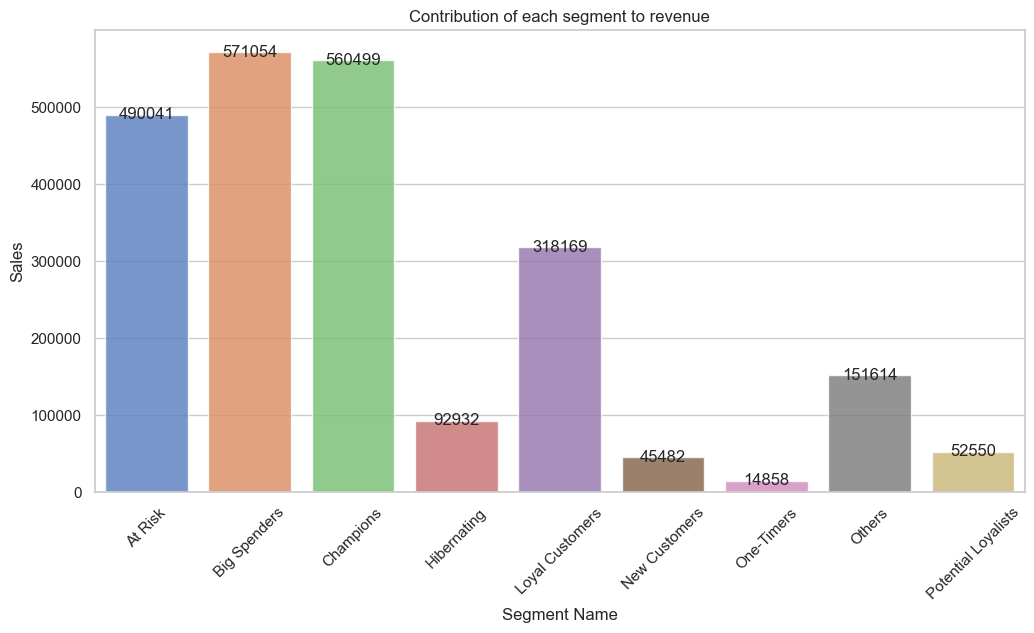

In [41]:
plt.figure(figsize=(12,6))

sns.barplot(
    x= segment_sales_values.index , 
    y= segment_sales_values.values,
    hue=segment_sales_values.index,
    palette= 'muted',
    alpha = 0.8
    
)
plt.title('Contribution of each segment to revenue')
plt.xlabel('Segment Name')
plt.ylabel('Sales')
plt.xticks(rotation = 45 )

for i , v in enumerate(segment_sales_values):
    plt.text(i , v , f'{v:.0f}' , va = 'center' , ha = 'center')
plt.show()

### Clustering customers (KMeans).

#### 1. Prepare RFM Data

In [42]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


#### 2. Choose Optimal Number of Clusters (Elbow Method)

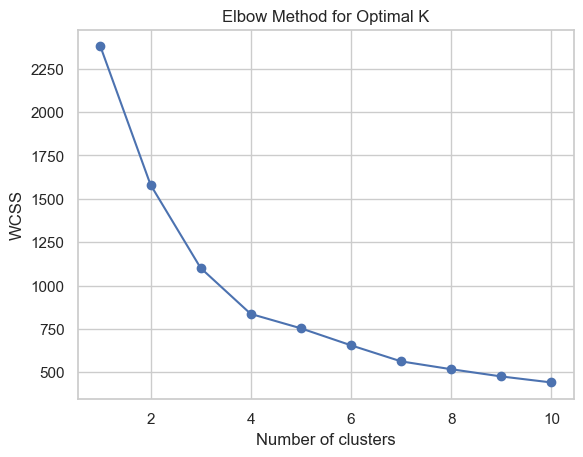

In [43]:
wcss = []  # within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


#### 3. Run KMeans with Optimal K

In [44]:
kmeans = KMeans(n_clusters= 4 , random_state= 42 )
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


#### 4. Analyze Cluster Characteristics

In [45]:
cluster_profile = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster': 'Count'})

print(cluster_profile)

            Recency  Frequency     Monetary  Count
Cluster                                           
0         72.741611   8.516779  3322.222985    298
1        101.197015   4.731343  1669.688290    335
2        123.718750   8.296875  9479.545687     64
3        559.489583   3.697917  1470.228226     96


#### 5. Visualize the Clusters

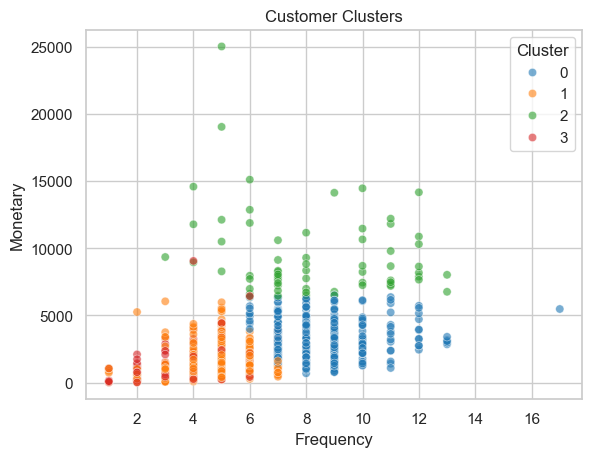

In [46]:
sns.scatterplot(data=rfm, x="Frequency", y="Monetary", hue="Cluster", palette="tab10", alpha = 0.6)
plt.title("Customer Clusters")
plt.show()


### 📊 Cluster Profiles

1. **Cluster 0 (298 customers)**
    - Recency ≈ 73 → They purchased relatively recently.
    - Frequency ≈ 8.5 → Medium purchase frequency.
    - Monetary ≈ 3,322 → Good spenders.
        
        🔹 Likely **loyal customers**.
        
2. **Cluster 1 (335 customers)**
    - Recency ≈ 101 → Longer since last purchase.
    - Frequency ≈ 4.7 → Low to medium frequency.
    - Monetary ≈ 1,670 → Lower spend.
        
        🔹 These are **at-risk or occasional customers**.
        
3. **Cluster 2 (64 customers)**
    - Recency ≈ 124 → Last purchase was a while ago.
    - Frequency ≈ 8.3 → Fairly frequent.
    - Monetary ≈ 9,480 → Very high spenders.
        
        🔹 These are **high-value VIP customers**.
        
4. **Cluster 3 (96 customers)**
    - Recency ≈ 559 → Extremely long since last purchase.
    - Frequency ≈ 3.7 → Very low frequency.
    - Monetary ≈ 1,470 → Low spenders.
        
        🔹 These are **churned customers**.

#### map each cluster automatically to meaningful segment labels

In [47]:
def assign_segment(row):
    """Map cluster profiles to meaningful labels."""
    if row['Recency'] <= 90 and row['Frequency'] >= 8 and row['Monetary'] >= 3000:
        return 'Champions'   # recent, frequent, and high spenders
    elif row['Recency'] <= 120 and row['Frequency'] >= 5:
        return 'Loyal Customers'  # purchase often, still recent
    elif row['Recency'] > 400 and row['Frequency'] <= 4:
        return 'Lost'  # haven’t purchased in a long time
    elif row['Recency'] > 120 and row['Frequency'] >= 5 and row['Monetary'] > 3000:
        return 'Big Spenders at Risk'  # used to spend a lot but less recent
    else:
        return 'Needs Attention'  # everyone else

# Apply to your cluster profile
cluster_profile['Segment'] = cluster_profile.apply(assign_segment, axis=1)

print(cluster_profile[['Recency','Frequency','Monetary','Count','Segment']])

            Recency  Frequency     Monetary  Count               Segment
Cluster                                                                 
0         72.741611   8.516779  3322.222985    298             Champions
1        101.197015   4.731343  1669.688290    335       Needs Attention
2        123.718750   8.296875  9479.545687     64  Big Spenders at Risk
3        559.489583   3.697917  1470.228226     96                  Lost
